In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

# Pour afficher les graphiques directement dans le notebook
%matplotlib inline

# Importation des données
df = pd.read_csv("C:/Users/sofia/OneDrive/Documents/GitHub/P_DM_UE3//data/combined_data.csv")
df.head()

,397.66,400.28,402.9,405.52,408.13,410.75,413.37,416.0,418.62,421.24,...,981.27,984.09,986.9,989.72,992.54,995.35,998.17,1000.99,1003.81,class
0,0.160989,0.152837,0.143099,0.132230,0.121732,0.113088,0.106684,0.102206,0.097464,0.094226,...,0.268508,0.268674,0.268942,0.269235,0.269651,0.270141,0.270695,0.271260,0.271902,canola
1,0.157316,0.148315,0.139275,0.129330,0.120090,0.112003,0.105155,0.100885,0.097040,0.093725,...,0.277404,0.277630,0.277895,0.278252,0.278681,0.279293,0.279852,0.280512,0.281131,canola
2,0.180705,0.171157,0.159826,0.147212,0.136382,0.126773,0.119723,0.115086,0.109832,0.105594,...,0.304266,0.304477,0.304762,0.305169,0.305732,0.306397,0.307044,0.307668,0.308387,canola
3,0.159618,0.151638,0.141948,0.131743,0.121592,0.112819,0.106271,0.101794,0.097496,0.094452,...,0.270041,0.270336,0.270555,0.270984,0.271544,0.272093,0.272727,0.273407,0.274073,canola
4,0.147031,0.139998,0.130906,0.121395,0.112400,0.104592,0.098618,0.095303,0.091420,0.088122,...,0.247827,0.248123,0.248419,0.248833,0.249397,0.249951,0.250570,0.251253,0.251939,canola


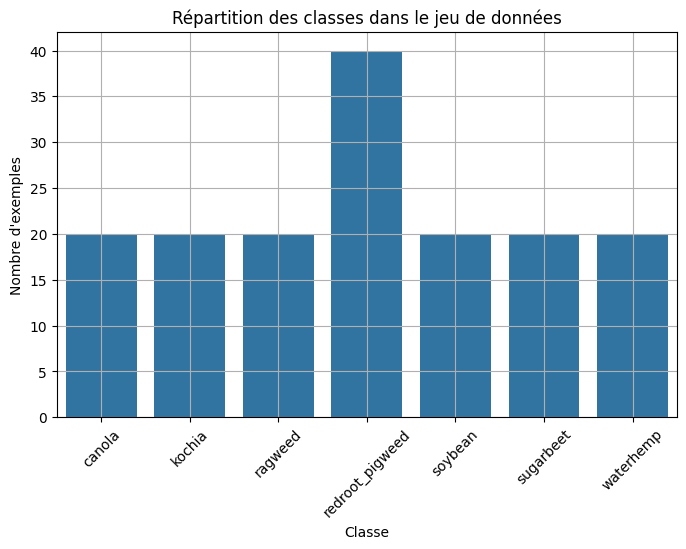

In [2]:

y = df['class']

# Visualisation corrigée
plt.figure(figsize=(8, 5))
sns.countplot(x=y)
plt.title("Répartition des classes dans le jeu de données")
plt.xlabel("Classe")
plt.ylabel("Nombre d'exemples")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [3]:
## Oversampling pour équilibrer le jeu de données

# Extraire la classe majoritaire
majority_class = df[df['class'] == 'redroot_pigweed']

# Extraire toutes les classes minoritaires
minority_classes = df[df['class'] != 'redroot_pigweed']

# Appliquer un oversampling pour chaque classe minoritaire
balanced_minority_list = []
for label in minority_classes['class'].unique():
    subset = minority_classes[minority_classes['class'] == label]
    upsampled = resample(subset, replace=True, n_samples=40, random_state=42)
    balanced_minority_list.append(upsampled)

# Fusionner toutes les classes
df_balanced = pd.concat([majority_class] + balanced_minority_list)


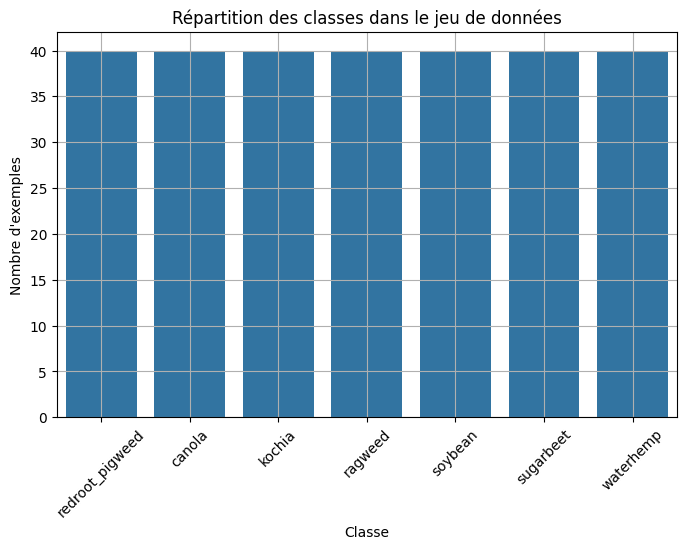

In [4]:
y = df_balanced['class']

# Visualisation corrigée
plt.figure(figsize=(8, 5))
sns.countplot(x=y)
plt.title("Répartition des classes dans le jeu de données")
plt.xlabel("Classe")
plt.ylabel("Nombre d'exemples")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

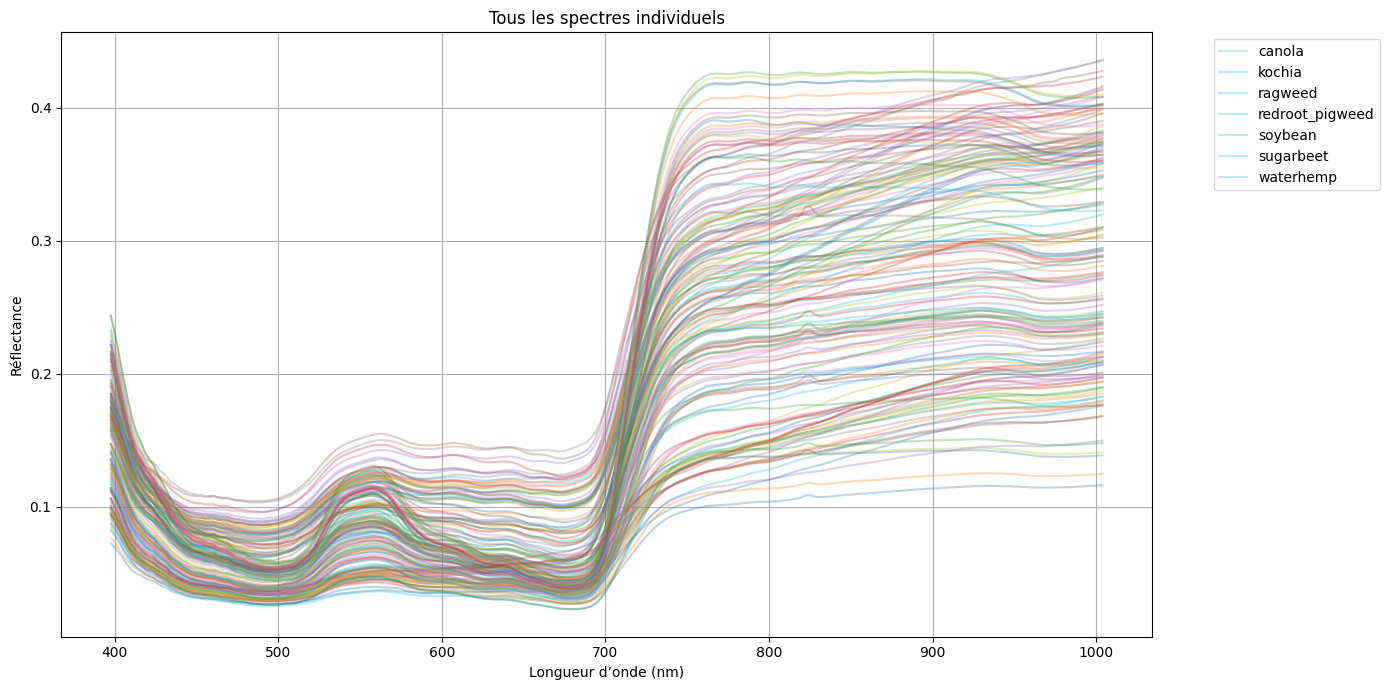

In [5]:
## Visualisation des données brutes

# X = colonnes spectrales (toutes sauf 'class')
X = df.drop(columns=["class"])

# y = étiquettes (noms de plantes)
y = df["class"]

# Conversion des longueurs d'onde en float pour les tracer
wavelengths = X.columns.astype(float)



plt.figure(figsize=(14, 7))

# Pour chaque échantillon, tracer son spectre avec une couleur correspondant à sa classe
for i in range(len(X)):
    plt.plot(wavelengths, X.iloc[i], alpha=0.3, label=y.iloc[i])

# Pour éviter les milliers de doublons dans la légende, on affiche une seule fois chaque classe
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Tous les spectres individuels")
plt.xlabel("Longueur d’onde (nm)")
plt.ylabel("Réflectance")
plt.grid(True)
plt.tight_layout()
plt.show()




In [7]:
## On centre et réduit les données

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Séparation des variables explicatives et de la cible
X_bal = df_balanced.drop(columns="class")
y_bal = df_balanced["class"]

# Centrage-réduction
scaler = StandardScaler()
X_bal_scaled = scaler.fit_transform(X_bal)

# Remettre dans un DataFrame
X_bal_scaled_df = pd.DataFrame(X_bal_scaled, columns=X_bal.columns)



In [8]:
# Encodage one-hot de la variable cible pour PLS-DA
y_encoded = pd.get_dummies(df_balanced['class'])

# Affichage pour vérifier
print(y_encoded.head())


    canola  kochia  ragweed  redroot_pigweed  soybean  sugarbeet  waterhemp
60   False   False    False             True    False      False      False
61   False   False    False             True    False      False      False
62   False   False    False             True    False      False      False
63   False   False    False             True    False      False      False
64   False   False    False             True    False      False      False


In [12]:
## Séparation du jeu de données et création du modèle simple à une composante latente

from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression

# Séparation en train / test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_bal_scaled, y_encoded, test_size=0.2, random_state=42)

# Création du modèle PLS avec une seule composante
pls = PLSRegression(n_components=1)

# Entraînement du modèle
pls.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = pls.predict(X_test)



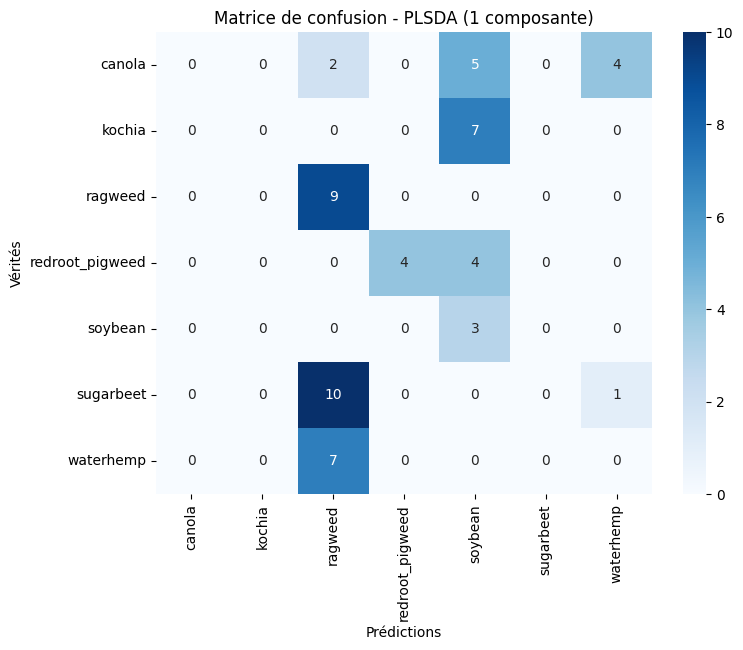

                 precision    recall  f1-score   support

         canola       0.00      0.00      0.00        11
         kochia       0.00      0.00      0.00         7
        ragweed       0.32      1.00      0.49         9
redroot_pigweed       1.00      0.50      0.67         8
        soybean       0.16      1.00      0.27         3
      sugarbeet       0.00      0.00      0.00        11
      waterhemp       0.00      0.00      0.00         7

       accuracy                           0.29        56
      macro avg       0.21      0.36      0.20        56
   weighted avg       0.20      0.29      0.19        56



c:\Users\sofia\anaconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sofia\anaconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sofia\anaconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [13]:
## Evaluation du modèle

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Conversion des prédictions en classes (argmax pour récupérer la classe dominante)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test.values, axis=1)

# 2. Matrice de confusion
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# 3. Affichage de la matrice
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_test.columns, yticklabels=y_test.columns)
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title("Matrice de confusion - PLSDA (1 composante)")
plt.show()

# 4. Rapport de classification (accuracy, precision, recall, f1-score)
print(classification_report(y_true_classes, y_pred_classes, target_names=y_test.columns))


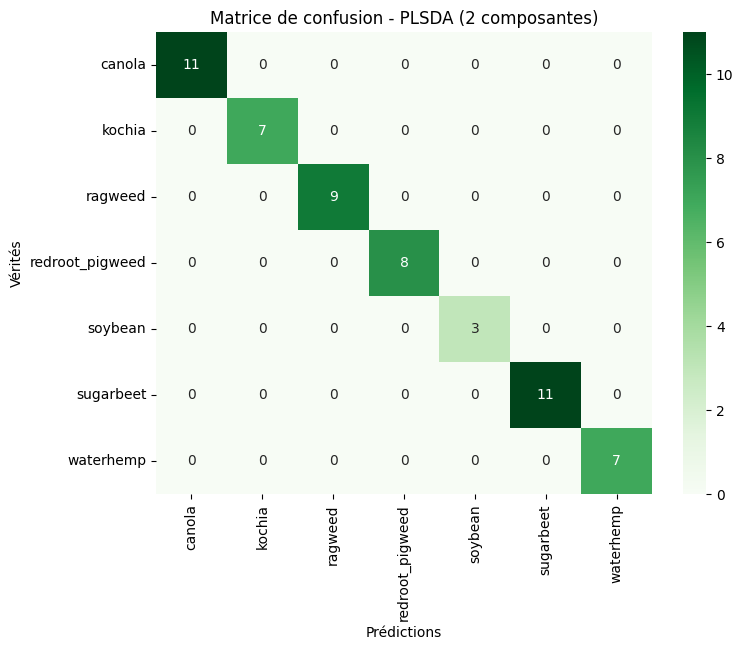

                 precision    recall  f1-score   support

         canola       1.00      1.00      1.00        11
         kochia       1.00      1.00      1.00         7
        ragweed       1.00      1.00      1.00         9
redroot_pigweed       1.00      1.00      1.00         8
        soybean       1.00      1.00      1.00         3
      sugarbeet       1.00      1.00      1.00        11
      waterhemp       1.00      1.00      1.00         7

       accuracy                           1.00        56
      macro avg       1.00      1.00      1.00        56
   weighted avg       1.00      1.00      1.00        56



In [15]:
## Créer le modèle avec deux composantes latentes

from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Modèle PLS avec 2 composantes latentes
pls2 = PLSRegression(n_components=10)

# 2. Entraînement sur les données d'entraînement
pls2.fit(X_train, y_train)

# 3. Prédiction sur les données de test
y_pred_2 = pls2.predict(X_test)

# 4. Conversion des prédictions en classes
y_pred_classes_2 = np.argmax(y_pred_2, axis=1)
y_true_classes = np.argmax(y_test.values, axis=1)

# 5. Matrice de confusion
conf_matrix_2 = confusion_matrix(y_true_classes, y_pred_classes_2)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Greens',
            xticklabels=y_test.columns, yticklabels=y_test.columns)
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title("Matrice de confusion - PLSDA (2 composantes)")
plt.show()

# 6. Rapport de classification
print(classification_report(y_true_classes, y_pred_classes_2, target_names=y_test.columns))


In [16]:
## Comparaison des deux modèles

from sklearn.metrics import accuracy_score

# 🔹 Modèle à 1 composante
pls1 = PLSRegression(n_components=1)
pls1.fit(X_train, y_train)
y_train_pred_1 = pls1.predict(X_train)
y_test_pred_1 = pls1.predict(X_test)

# 🔹 Modèle à 10 composantes
pls10 = PLSRegression(n_components=10)
pls10.fit(X_train, y_train)
y_train_pred_10 = pls10.predict(X_train)
y_test_pred_10 = pls10.predict(X_test)

# 🔄 Conversion en classes
y_train_true = np.argmax(y_train.values, axis=1)
y_test_true = np.argmax(y_test.values, axis=1)

y_train_class_1 = np.argmax(y_train_pred_1, axis=1)
y_test_class_1 = np.argmax(y_test_pred_1, axis=1)

y_train_class_10 = np.argmax(y_train_pred_10, axis=1)
y_test_class_10 = np.argmax(y_test_pred_10, axis=1)

# 🎯 Calcul des accuracy
acc_train_1 = accuracy_score(y_train_true, y_train_class_1)
acc_test_1 = accuracy_score(y_test_true, y_test_class_1)

acc_train_10 = accuracy_score(y_train_true, y_train_class_10)
acc_test_10 = accuracy_score(y_test_true, y_test_class_10)

# 📊 Affichage
print(f"🔹 Modèle à 1 composante : Accuracy Train = {acc_train_1:.2f} | Test = {acc_test_1:.2f}")
print(f"🔹 Modèle à 10 composantes : Accuracy Train = {acc_train_10:.2f} | Test = {acc_test_10:.2f}")


🔹 Modèle à 1 composante : Accuracy Train = 0.35 | Test = 0.29
🔹 Modèle à 10 composantes : Accuracy Train = 1.00 | Test = 1.00


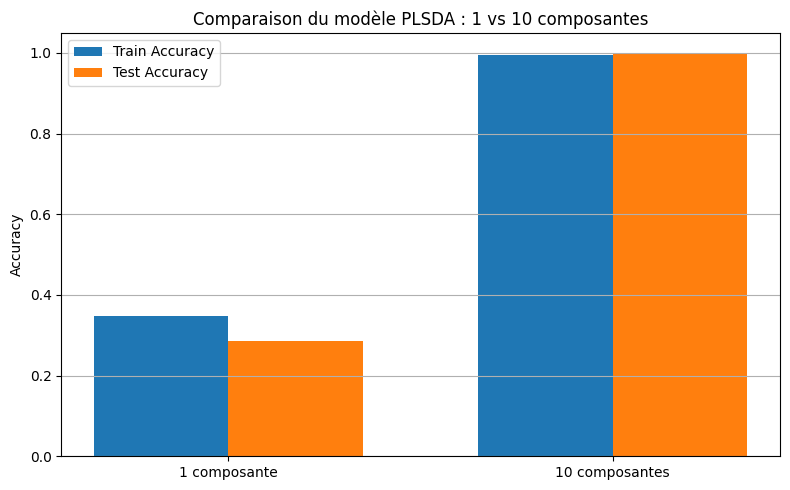

In [17]:
import matplotlib.pyplot as plt

# Données à tracer
labels = ['1 composante', '10 composantes']
train_accuracies = [acc_train_1, acc_train_10]
test_accuracies = [acc_test_1, acc_test_10]

x = range(len(labels))

# Graphique
plt.figure(figsize=(8, 5))
plt.bar(x, train_accuracies, width=0.35, label='Train Accuracy', align='center')
plt.bar([i + 0.35 for i in x], test_accuracies, width=0.35, label='Test Accuracy', align='center')

# Habillage
plt.xticks([i + 0.175 for i in x], labels)
plt.ylim(0, 1.05)
plt.ylabel("Accuracy")
plt.title("Comparaison du modèle PLSDA : 1 vs 10 composantes")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [19]:
## Mise en évidence du surapprentissage par la méthode de validation croisée

from sklearn.model_selection import KFold
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Initialisation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores_1 = []
scores_10 = []

X = X_bal_scaled
y = y_encoded.values
y_classes = np.argmax(y, axis=1)  # vraies classes (entiers)

# Cross-validation manuelle
for train_idx, test_idx in cv.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    y_true = y_classes[test_idx]

    # Modèle à 1 composante
    pls1 = PLSRegression(n_components=1)
    pls1.fit(X_train, y_train)
    y_pred_1 = pls1.predict(X_test)
    y_pred_1_classes = np.argmax(y_pred_1, axis=1)
    scores_1.append(accuracy_score(y_true, y_pred_1_classes))

    # Modèle à 10 composantes
    pls10 = PLSRegression(n_components=10)
    pls10.fit(X_train, y_train)
    y_pred_10 = pls10.predict(X_test)
    y_pred_10_classes = np.argmax(y_pred_10, axis=1)
    scores_10.append(accuracy_score(y_true, y_pred_10_classes))

# Résultats
print(f"🔹 Accuracy moyenne (1 composante) : {np.mean(scores_1):.2f} ± {np.std(scores_1):.2f}")
print(f"🔹 Accuracy moyenne (10 composantes) : {np.mean(scores_10):.2f} ± {np.std(scores_10):.2f}")





🔹 Accuracy moyenne (1 composante) : 0.29 ± 0.03
🔹 Accuracy moyenne (10 composantes) : 1.00 ± 0.01


In [20]:
## Sélection du bon nombre de composantes latentes

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.cross_decomposition import PLSRegression
import numpy as np

# Variables
X = X_bal_scaled
y = y_encoded.values
y_classes = np.argmax(y, axis=1)

# Initialisation du validateur
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Test des modèles avec 1 à 10 composantes
print("📊 Résultats de la validation croisée :\n")
for n in range(1, 11):
    scores = []
    for train_idx, test_idx in cv.split(X):
        X_train_cv, X_test_cv = X[train_idx], X[test_idx]
        y_train_cv, y_test_cv = y[train_idx], y[test_idx]
        y_true_cv = y_classes[test_idx]

        pls = PLSRegression(n_components=n)
        pls.fit(X_train_cv, y_train_cv)
        y_pred_cv = pls.predict(X_test_cv)
        y_pred_classes = np.argmax(y_pred_cv, axis=1)

        scores.append(accuracy_score(y_true_cv, y_pred_classes))

    print(f"🔸 {n} composantes : Accuracy moyenne = {np.mean(scores):.2f} | Écart-type = {np.std(scores):.2f}")


📊 Résultats de la validation croisée :

🔸 1 composantes : Accuracy moyenne = 0.29 | Écart-type = 0.03
🔸 2 composantes : Accuracy moyenne = 0.48 | Écart-type = 0.06
🔸 3 composantes : Accuracy moyenne = 0.67 | Écart-type = 0.08
🔸 4 composantes : Accuracy moyenne = 0.71 | Écart-type = 0.16
🔸 5 composantes : Accuracy moyenne = 0.80 | Écart-type = 0.12
🔸 6 composantes : Accuracy moyenne = 0.91 | Écart-type = 0.05
🔸 7 composantes : Accuracy moyenne = 0.95 | Écart-type = 0.03
🔸 8 composantes : Accuracy moyenne = 0.95 | Écart-type = 0.03
🔸 9 composantes : Accuracy moyenne = 1.00 | Écart-type = 0.01
🔸 10 composantes : Accuracy moyenne = 1.00 | Écart-type = 0.01


🎯 Accuracy finale du modèle à 6 composantes : 0.96


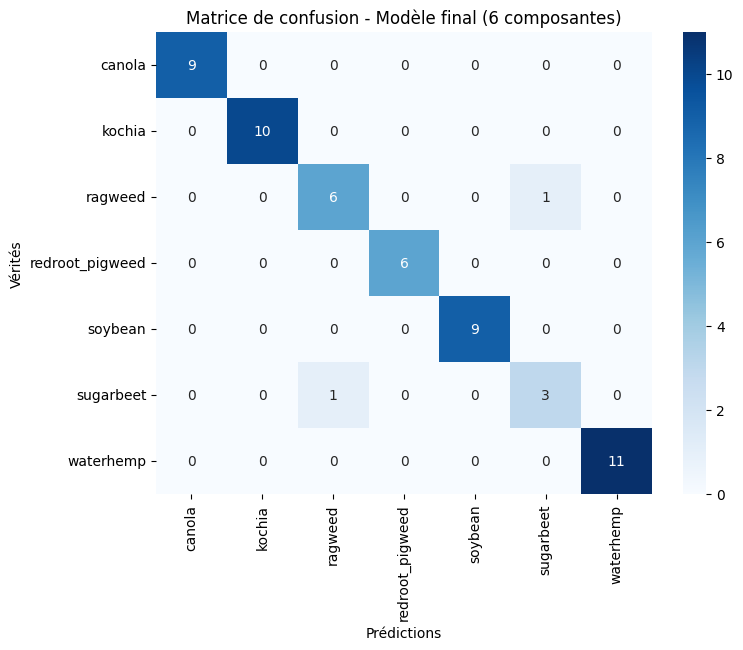

📋 Rapport de classification :
                 precision    recall  f1-score   support

         canola       1.00      1.00      1.00         9
         kochia       1.00      1.00      1.00        10
        ragweed       0.86      0.86      0.86         7
redroot_pigweed       1.00      1.00      1.00         6
        soybean       1.00      1.00      1.00         9
      sugarbeet       0.75      0.75      0.75         4
      waterhemp       1.00      1.00      1.00        11

       accuracy                           0.96        56
      macro avg       0.94      0.94      0.94        56
   weighted avg       0.96      0.96      0.96        56



In [24]:
## Sélection du modèle final (6 composantes)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Créer et entraîner le modèle final
pls_final = PLSRegression(n_components=6)
pls_final.fit(X_train, y_train)

# 2. Prédictions sur le jeu de test
y_pred_test = pls_final.predict(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_true_test = np.argmax(y_test, axis=1)

# 3. Accuracy globale
acc_final = accuracy_score(y_true_test, y_pred_test_classes)
print(f"🎯 Accuracy finale du modèle à 6 composantes : {acc_final:.2f}")

# 4. Matrice de confusion
class_names = y_encoded.columns  # on récupère les noms depuis le DataFrame original

conf_matrix = confusion_matrix(y_true_test, y_pred_test_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title("Matrice de confusion - Modèle final (6 composantes)")
plt.show()

# 5. Rapport de classification
print("📋 Rapport de classification :")
print(classification_report(y_true_test, y_pred_test_classes, target_names=class_names))


In [25]:
## Affichage des caractéristiques du modèle

# Récupération des noms de variables (colonnes de X)
feature_names = X_bal.columns

# Récupération des poids (x_weights_) et des chargements (x_loadings_)
x_weights = pls_final.x_weights_         # poids des variables X pour chaque composante
x_loadings = pls_final.x_loadings_       # chargements des variables X sur les composantes

# Création de DataFrames pour visualiser facilement
import pandas as pd

weights_df = pd.DataFrame(x_weights, index=feature_names, columns=[f"Composante {i+1}" for i in range(x_weights.shape[1])])
loadings_df = pd.DataFrame(x_loadings, index=feature_names, columns=[f"Composante {i+1}" for i in range(x_loadings.shape[1])])

# Affichage
print("🔹 Poids (x_weights_) :")
display(weights_df.head())

print("🔹 Chargements (x_loadings_) :")
display(loadings_df.head())


🔹 Poids (x_weights_) :


,Composante 1,Composante 2,Composante 3,Composante 4,Composante 5,Composante 6
397.66,0.064518,-0.079267,0.106834,0.093706,-0.024179,0.145293
400.28,0.065212,-0.075469,0.095735,0.097856,-0.028933,0.144728
402.9,0.066049,-0.071277,0.082589,0.099409,-0.027482,0.148446
405.52,0.066874,-0.066422,0.072796,0.104517,-0.015461,0.153352
408.13,0.067686,-0.061241,0.064845,0.112051,-0.014481,0.149460


🔹 Chargements (x_loadings_) :


,Composante 1,Composante 2,Composante 3,Composante 4,Composante 5,Composante 6
397.66,0.064315,-0.077917,0.076530,0.138493,-0.034559,0.213791
400.28,0.065040,-0.074354,0.067461,0.135240,-0.034785,0.208416
402.9,0.065817,-0.070360,0.056401,0.131576,-0.038875,0.200884
405.52,0.066606,-0.065513,0.048374,0.130375,-0.034318,0.201306
408.13,0.067330,-0.060466,0.041366,0.132416,-0.036466,0.190367
